In [11]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [12]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-12-22 23:41:28--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2025-12-22 23:41:29 (3.75 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [13]:
#run the cell before this if you make anny changes
gender_mapping = {'male': 0, 'female': 1}
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
smoker_mapping = {'yes': 1, 'no': 0}


dataset['region'] = dataset['region'].str.strip().map(region_mapping)
dataset['sex'] = dataset['sex'].map(gender_mapping)
dataset['smoker'] = dataset['smoker'].map(smoker_mapping)


print(dataset)

      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       0  16884.92
1      18    0  33.8         1       0       1   1725.55
2      28    0  33.0         3       0       1   4449.46
3      33    0  22.7         0       0       2  21984.47
4      32    0  28.9         0       0       2   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       0       2  10600.55
1334   18    1  31.9         0       0       3   2205.98
1335   18    1  36.9         0       0       1   1629.83
1336   21    1  25.8         0       0       0   2007.95
1337   61    1  29.1         0       1       2  29141.36

[1338 rows x 7 columns]


In [14]:
test_dataset = dataset.sample(frac=0.2)
train_dataset = dataset.drop(test_dataset.index)

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [19]:
# Normalize the training data
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

# Apply normalization
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)  # Use TRAIN stats for test data too!

In [20]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Train with NORMALIZED data
history = model.fit(
    normed_train_data,
    train_labels,
    epochs=500,
    validation_split=0.2,
    verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()]
)

# Evaluate with NORMALIZED test data
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)  # ← Use normalized
print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

# Predictions also use normalized data
test_predictions = model.predict(normed_test_data).flatten()  # ← Use normalize


Epoch: 0, loss:312477664.0000,  mae:13144.7139,  mse:312477664.0000,  val_loss:314542400.0000,  val_mae:13206.9727,  val_mse:314542400.0000,  
....................................................................................................
Epoch: 100, loss:33537358.0000,  mae:3950.0474,  mse:33537358.0000,  val_loss:31271290.0000,  val_mae:3896.6885,  val_mse:31271290.0000,  
....................................................................................................
Epoch: 200, loss:30575680.0000,  mae:3672.2112,  mse:30575680.0000,  val_loss:28549754.0000,  val_mae:3607.1221,  val_mse:28549754.0000,  
....................................................................................................
Epoch: 300, loss:26832714.0000,  mae:3294.6350,  mse:26832714.0000,  val_loss:25580608.0000,  val_mae:3276.8040,  val_mse:25580608.0000,  
....................................................................................................
Epoch: 400, loss:24389596.0000,  ma

9/9 - 0s - 6ms/step - loss: 24203798.0000 - mae: 2993.6018 - mse: 24203798.0000
Testing set Mean Abs Error: 2993.60 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


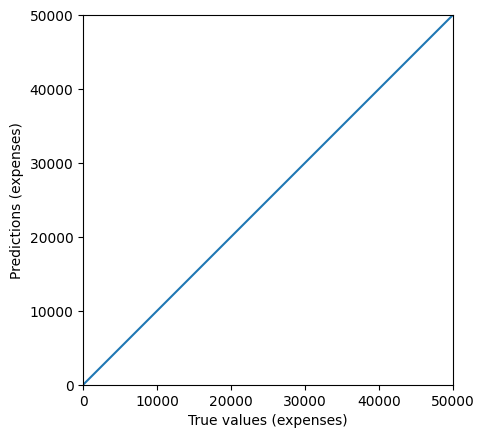

In [23]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
